In [1]:
import numpy as np
import pandas as pd

def calc_cagr(begin, final, years):
    if final < 0:
        return (-1) * (((abs(final) + 2 * begin) / begin) ** (1 / years) - 1)
    else:
        return (final / begin) ** (1 / years) - 1
    
btcusdt_marketmaking_vip0 = pd.read_pickle("btcusdt-marketmaking-vip0")
btcusdt_marketmaking_vip9 = pd.read_pickle("btcusdt-marketmaking-vip9")

btcusdt_simple_vip0 = pd.read_pickle("btcusdt-simple-vip0")
btcusdt_simple_vip9 = pd.read_pickle("btcusdt-simple-vip9")

In [2]:
weights = [1, 1]

net_equity_vip0 = weights[0] * btcusdt_marketmaking_vip0 + weights[1] * btcusdt_simple_vip0
net_equity_vip9 = weights[0] * btcusdt_marketmaking_vip9 + weights[1] * btcusdt_simple_vip9

max_position = np.sum(weights * 1000000) # no leverage (1x leverage)

<AxesSubplot:xlabel='timestamp'>

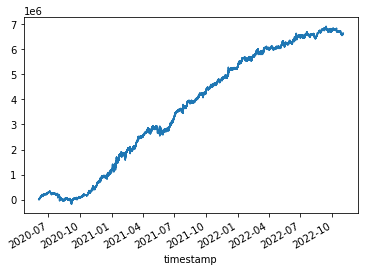

In [3]:
net_equity_vip0.plot()

<AxesSubplot:xlabel='timestamp'>

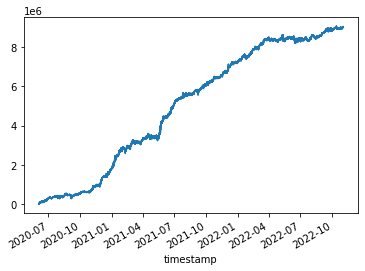

In [4]:
net_equity_vip9.plot()

In [5]:
df = pd.read_pickle('btcusdt_data')

In [6]:
close = df['close'].resample('1d').last()

Start date            2020-06-03
End date              2022-11-02
Time period (days)           881
Sharpe ratio            0.022638
CAGR                    0.833358
RRR                     3.169027
Maximum drawdown         0.26297
dtype: object


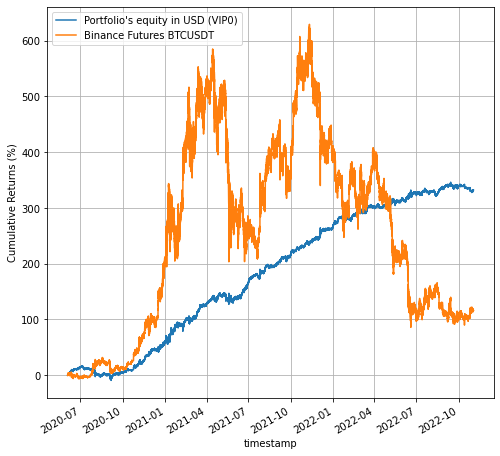

In [7]:
equity = net_equity_vip0

returns = equity.diff() / max_position
sr = np.divide(returns.mean(), returns.std()) * np.sqrt(365)

Roll_Max = equity.cummax()
Daily_Drawdown = (equity - Roll_Max) / max_position
Max_Daily_Drawdown = Daily_Drawdown.cummin()

period = (equity.index[-1] - equity.index[0]).days

print(pd.Series({
    'Start date': equity.index[0].strftime('%Y-%m-%d'),
    'End date': equity.index[-1].strftime('%Y-%m-%d'),
    'Time period (days)': period,
    'Sharpe ratio': sr,
    'CAGR': calc_cagr(max_position, max_position + equity[-1], period / 365),
    'RRR': calc_cagr(max_position, max_position + equity[-1], period / 365) / -Max_Daily_Drawdown.min(),
    'Maximum drawdown': -Max_Daily_Drawdown.min(),
}))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax1 = (equity / max_position * 100).plot()
ax2 = ((df['close'] / df['close'][0] - 1) * 100).plot()
ax1.set_ylabel('Cumulative Returns (%)')
ax1.legend(["Portfolio's equity in USD (VIP0)", 'Binance Futures BTCUSDT'])
ax1.grid()

Start date            2020-06-03
End date              2022-11-02
Time period (days)           881
Sharpe ratio             0.02854
CAGR                    1.028897
RRR                     4.639416
Maximum drawdown        0.221773
dtype: object


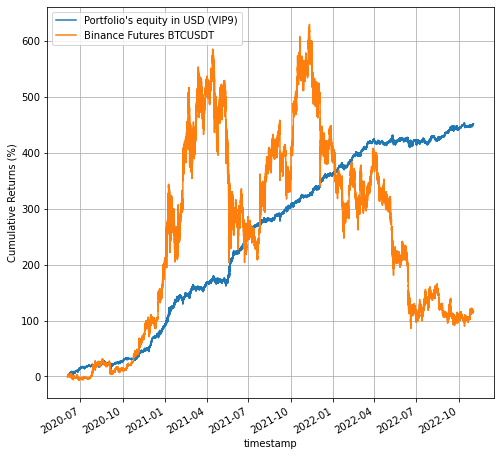

In [8]:
equity = net_equity_vip9

returns = equity.diff() / max_position
sr = np.divide(returns.mean(), returns.std()) * np.sqrt(365)

Roll_Max = equity.cummax()
Daily_Drawdown = (equity - Roll_Max) / max_position
Max_Daily_Drawdown = Daily_Drawdown.cummin()

period = (equity.index[-1] - equity.index[0]).days

print(pd.Series({
    'Start date': equity.index[0].strftime('%Y-%m-%d'),
    'End date': equity.index[-1].strftime('%Y-%m-%d'),
    'Time period (days)': period,
    'Sharpe ratio': sr,
    'CAGR': calc_cagr(max_position, max_position + equity[-1], period / 365),
    'RRR': calc_cagr(max_position, max_position + equity[-1], period / 365) / -Max_Daily_Drawdown.min(),
    'Maximum drawdown': -Max_Daily_Drawdown.min(),
}))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax1 = (equity / max_position * 100).plot()
ax2 = ((df['close'] / df['close'][0] - 1) * 100).plot()
ax1.set_ylabel('Cumulative Returns (%)')
ax1.legend(["Portfolio's equity in USD (VIP9)", 'Binance Futures BTCUSDT'])
ax1.grid()

<AxesSubplot:xlabel='timestamp'>

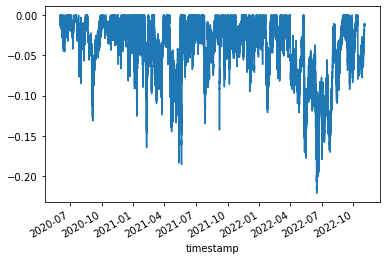

In [9]:
Daily_Drawdown.plot()